In [4]:
import json
import numpy as np
from sklearn.model_selection import train_test_split   
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = "audio_data.json"

In [3]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    # convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets

In [33]:
def plot_history(history):
    # Define the height and width
    fig, axis = plt.subplots(2, 1, figsize=(10, 8))  # (10, 8) = (width, height)

    # create accuracy subplot
    axis[0].plot(history.history["accuracy"], label="Train Accuracy")
    axis[0].plot(history.history["val_accuracy"], label="Test Accuracy")
    axis[0].set_ylabel("Accuracy")
    axis[0].set_xlabel("Epoch")
    axis[0].legend(loc="lower right")
    axis[0].set_title("Accuracy Evaluation")

    # create error subplot
    axis[1].plot(history.history["loss"], label="Train Error")
    axis[1].plot(history.history["val_loss"], label="Test Error")
    axis[1].set_ylabel("Error")
    axis[1].set_xlabel("Epoch")
    axis[1].legend(loc="upper right")
    axis[1].set_title("Error Evaluation")

    plt.subplots_adjust(hspace=0.7)
    plt.show()

In [37]:
if __name__ == "__main__":
    # load data
    inputs, targets = load_data(DATASET_PATH)

    # split the data into train and test sets
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)  

    # build the network architecture
    model = keras.Sequential([
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

        # 1st hidden layer
        keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 2nd hidden layer
        keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 3rd hidden layer
        keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # output layer (neuron_count=10)
        keras.layers.Dense(10, activation="softmax")
    ])

    # compile network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])    

    model.summary()

    # train network
    history = model.fit(inputs_train, targets_train,
              validation_data=(inputs_test, targets_test),
              epochs=100,
              batch_size=32)

    # # plot accuracy and error over the epochs
    # plot_history(history)
    

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 1690)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               865792    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)               

<br><br>

## Before solve the overfitting problem

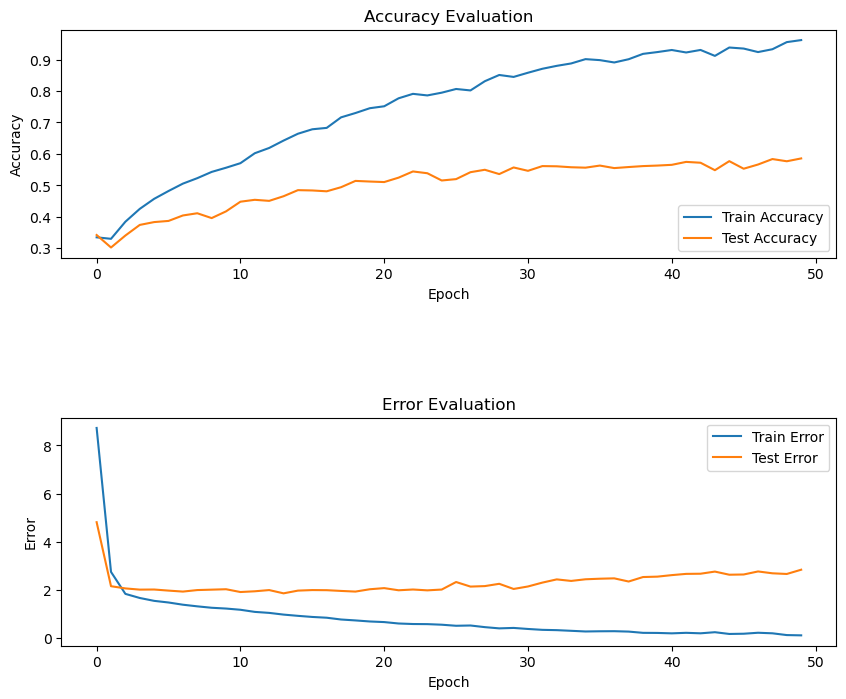

In [34]:
plot_history(history)

<br>

---

<br><br>

## After solve the overfitting problem

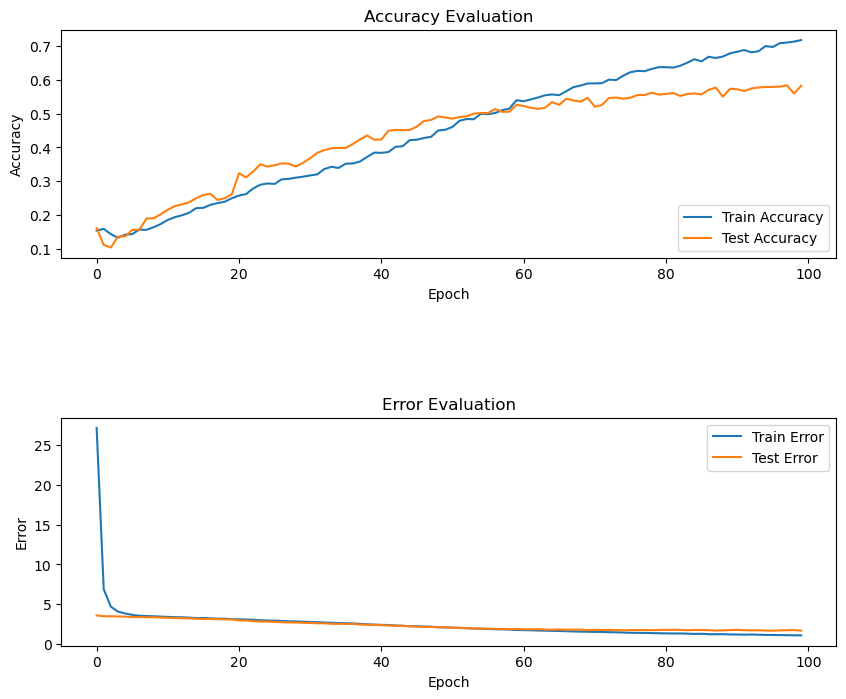

In [38]:
plot_history(history)